<a href="https://colab.research.google.com/github/ali-workshop/simple-Forecasting-Heart-Disease-with-Different-ML-Algorithms-boosting-/blob/main/High_Accuracy_(98_)_Model_for_Forecasting_Heart_Disease_with_Different_ML_Algorithms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import warnings
import seaborn as sns
# from colorama import Fore, Back, Style
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline
import pandas as pd
import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

#key:6463b4d76523a3d511aadcdd9df378ec

In [ ]:
od.download("https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data")

Skipping, found downloaded files in "./heart-failure-clinical-data" (use force=True to force download)


In [ ]:
heart_data = pd.read_csv('/content/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


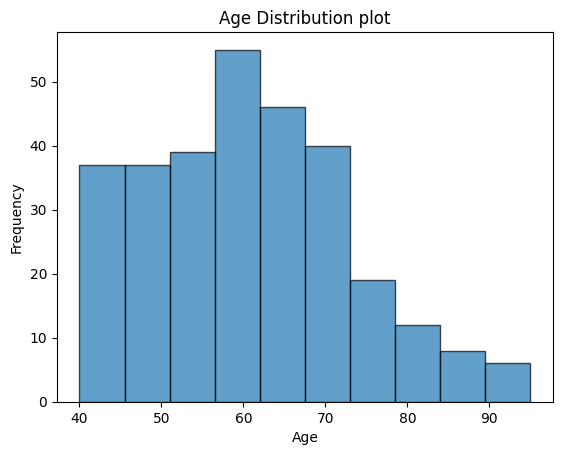

In [ ]:

# Create a histogram plot for age distribution
plt.hist(heart_data['age'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution plot')

plt.show()

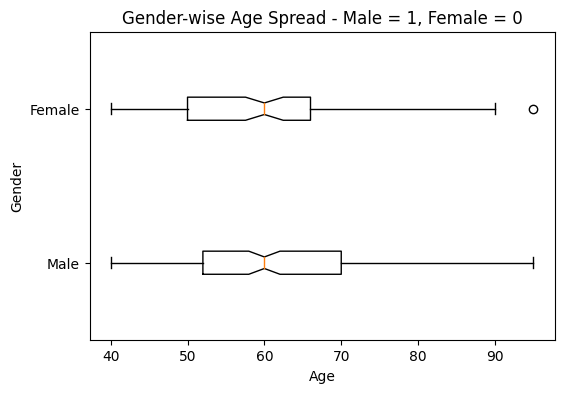

In [ ]:


# Create a box plot
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.boxplot([heart_data[heart_data['sex'] == 1]['age'], heart_data[heart_data['sex'] == 0]['age']],
            labels=['Male', 'Female'], notch=True, vert=False)
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title('Gender-wise Age Spread - Male = 1, Female = 0')

plt.show()

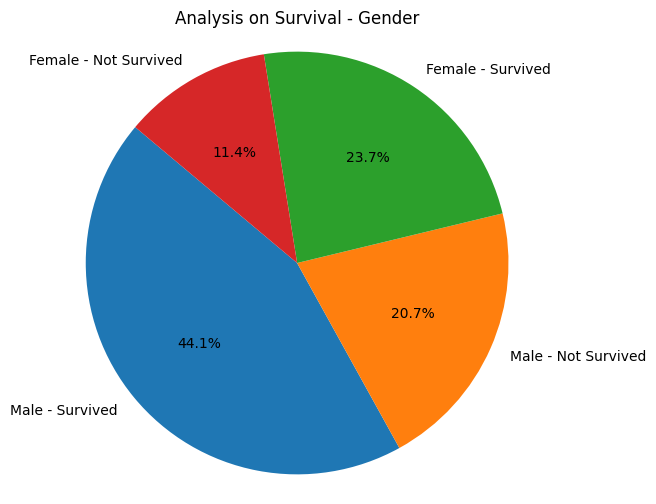

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Separate data by gender and survival status
male_survi = heart_data[(heart_data["sex"] == 1) & (heart_data["DEATH_EVENT"] == 0)]
male_not = heart_data[(heart_data["sex"] == 1) & (heart_data["DEATH_EVENT"] == 1)]
female_survi = heart_data[(heart_data["sex"] == 0) & (heart_data["DEATH_EVENT"] == 0)]
female_not = heart_data[(heart_data["sex"] == 0) & (heart_data["DEATH_EVENT"] == 1)]

# Count the number of samples in each category
counts = [
    len(male_survi), len(male_not),
    len(female_survi), len(female_not)
]

# Labels for the pie chart
labels = ['Male - Survived', 'Male - Not Survived', 'Female - Survived', 'Female - Not Survived']

# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Analysis on Survival - Gender")

plt.show()


In [ ]:
heart_data["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
lab=heart_data["DEATH_EVENT"]

In [ ]:
smote = SMOTE(sampling_strategy={1: 1000, 0: 1000}, random_state=42)
heart_data, lab = smote.fit_resample(heart_data, lab)

In [ ]:
heart_data["DEATH_EVENT"].value_counts()

1    1000
0    1000
Name: DEATH_EVENT, dtype: int64

In [ ]:
X=heart_data.drop(["DEATH_EVENT"],axis=1)
y=heart_data["DEATH_EVENT"]

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
# Setting up a standard scaler for the features and analyzing it thereafter
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2000.0,3.410605e-16,1.00025,-2.065844,-0.763784,-0.060151,0.687617,3.041108
anaemia,2000.0,3.552714e-17,1.00025,-0.565802,-0.565802,-0.565802,-0.565802,1.767402
creatinine_phosphokinase,2000.0,2.131628e-17,1.00025,-0.654740,-0.503755,-0.282269,0.042785,9.125575
diabetes,2000.0,5.684342e-17,1.00025,-0.552705,-0.552705,-0.552705,-0.552705,1.809283
ejection_fraction,2000.0,-1.563194e-16,1.00025,-2.210553,-0.650599,-0.065616,0.616865,4.224260
high_blood_pressure,2000.0,5.684342e-17,1.00025,-0.458172,-0.458172,-0.458172,-0.458172,2.182588
platelets,2000.0,2.096101e-16,1.00025,-2.600084,-0.566939,0.006971,0.463152,6.426095
serum_creatinine,2000.0,0.000000e+00,1.00025,-1.023375,-0.536277,-0.341437,0.168944,7.646977
serum_sodium,2000.0,-1.165290e-15,1.00025,-6.152218,-0.501563,0.036595,0.574752,3.265541
sex,2000.0,0.000000e+00,1.00025,-0.915552,-0.915552,-0.915552,1.092237,1.092237


In [ ]:
#spliting variables into training and test sets
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=25)

In [ ]:
# Instantiating the SVM algorithm
model1=svm.SVC()

# Fitting the model
model1.fit (X_train, y_train)

# Predicting the test variables
y_pred = model1.predict(X_test)

# Getting the score
model1.score (X_test, y_test)

0.9375

In [ ]:
# Printing classification report (since there was biasness in target labels)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       193
           1       0.94      0.94      0.94       207

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [ ]:
X_train.shape

(1600, 12)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 25, epochs = 80,callbacks=[early_stopping], validation_split=0.25)


Epoch 1/80
48/48 [==============================] - 7s 19ms/step - loss: 0.6931 - accuracy: 0.5083 - val_loss: 0.6929 - val_accuracy: 0.8375
Epoch 2/80
48/48 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.6875 - val_loss: 0.6783 - val_accuracy: 0.8425
Epoch 3/80
48/48 [==============================] - 0s 7ms/step - loss: 0.6385 - accuracy: 0.7533 - val_loss: 0.5652 - val_accuracy: 0.8625
Epoch 4/80
48/48 [==============================] - 0s 9ms/step - loss: 0.5121 - accuracy: 0.7383 - val_loss: 0.4013 - val_accuracy: 0.8575
Epoch 5/80
48/48 [==============================] - 0s 8ms/step - loss: 0.4287 - accuracy: 0.7550 - val_loss: 0.3490 - val_accuracy: 0.8625
Epoch 6/80
48/48 [==============================] - 0s 7ms/step - loss: 0.3931 - accuracy: 0.8617 - val_loss: 0.3369 - val_accuracy: 0.8500
Epoch 7/80
48/48 [==============================] - 0s 7ms/step - loss: 0.3895 - accuracy: 0.8675 - val_loss: 0.3369 - val_accuracy: 0.8475
Epoch 8/80
48/48 [=

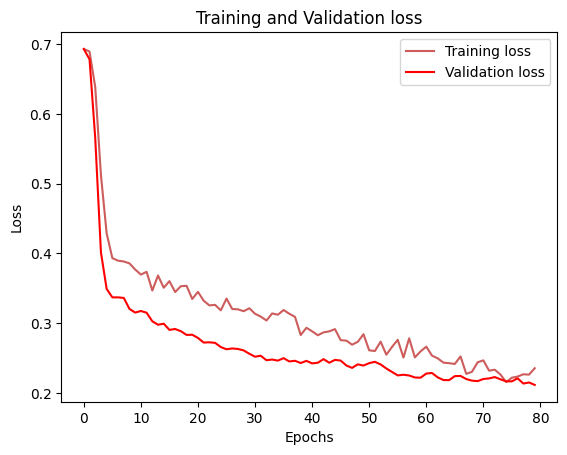

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()


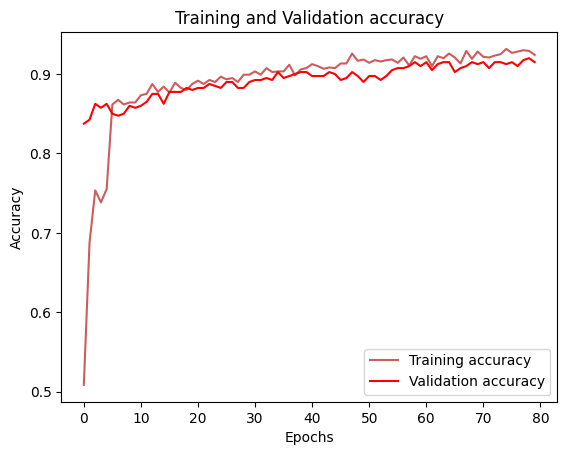

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.4)
np.set_printoptions()

13/13 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       193
           1       0.91      0.98      0.94       207

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier


# Initialize various classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP Neural Network': MLPClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier()
}

# Train and evaluate each classifier
results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print the results
for name, accuracy in results.items():
    print(f'{name}: Accuracy = {accuracy:.2f}')


Learning rate set to 0.012592
0:	learn: 0.6788468	total: 49.3ms	remaining: 49.3s
1:	learn: 0.6653349	total: 51.5ms	remaining: 25.7s
2:	learn: 0.6527218	total: 53.7ms	remaining: 17.8s
3:	learn: 0.6405020	total: 55.8ms	remaining: 13.9s
4:	learn: 0.6297266	total: 57.7ms	remaining: 11.5s
5:	learn: 0.6175291	total: 59.8ms	remaining: 9.91s
6:	learn: 0.6054904	total: 65.4ms	remaining: 9.28s
7:	learn: 0.5927476	total: 68.2ms	remaining: 8.46s
8:	learn: 0.5819273	total: 71.1ms	remaining: 7.83s
9:	learn: 0.5707625	total: 72.9ms	remaining: 7.22s
10:	learn: 0.5602821	total: 75ms	remaining: 6.75s
11:	learn: 0.5514286	total: 77.1ms	remaining: 6.35s
12:	learn: 0.5405770	total: 79.2ms	remaining: 6.02s
13:	learn: 0.5294222	total: 81.5ms	remaining: 5.74s
14:	learn: 0.5220740	total: 83.8ms	remaining: 5.5s
15:	learn: 0.5127108	total: 85.8ms	remaining: 5.28s
16:	learn: 0.5044275	total: 87.9ms	remaining: 5.08s
17:	learn: 0.4953964	total: 89.9ms	remaining: 4.91s
18:	learn: 0.4881562	total: 92.1ms	remaining: 4